In [2]:
# libraries

import numpy as np
from utils import *
from geomutils import *
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [38]:
# apposto

def errorAndJacobian(x, P, Z):

    rx = Rx(x[3])
    ry = Ry(x[4])
    rz = Rz(x[5])

    t = x[:3]    

    print("P", P)
    print("P shape", P.shape)

    print("P-t", P.T)
    print("P-t shape", P.T.shape)

    z_hat = np.dot(np.dot(rx, ry), rz) @ P.T + t

    e = Z - z_hat.T
    J = np.zeros((3,6))
    J[:3, :3] = np.eye(3)

    rx_prime = Rx_prime(x[3])
    ry_prime = Ry_prime(x[4])
    rz_prime = Rz_prime(x[5])

    J[:3, 3] = np.dot(np.dot(rx_prime, ry), rz) @ P.T
    J[:3, 4] = np.dot(np.dot(rx, ry_prime), rz) @ P.T
    J[:3, 5] = np.dot(np.dot(rx, ry), rz_prime) @ P.T

    return e, J

In [39]:
def doICP(x_guess, points, Z, iterations, damping, kernel_threshold):
    x = x_guess
    chi_state = np.zeros(iterations)    
    num_inliers = np.zeros((iterations))

    for i in range(iterations):
        #print("Iteration number ", i)
        H = np.zeros((6,6))
        b = np.zeros((6))
        chi = 0

        for j in range(points.shape[0]):
            e, J = errorAndJacobian(x, points[j,:], Z[j,:])
            H += J.T @ J
            b += J.T @ e

            chi += e.T @ e
            #print("chi", chi)
            if(chi > kernel_threshold):
                e = math.sqrt(kernel_threshold/chi) * e
                chi = kernel_threshold

            else:
                num_inliers[i] += 1                         

        chi_state[i] = chi
        #print(chi_state[i])
        
        dx = np.linalg.solve(H, b.T)
        x = x + dx.T    
    return x, chi_state, num_inliers

In [40]:
## data

n_points = 5

# Generate random points in 3d
points = np.random.random((n_points, 3))
#print("Random points\n", points)

# ideal position of the world in respect to the robot, in our case the HMD
x_true = np.array([0, 0, 0, np.pi/2, np.pi/6, np.pi/3])
#print("Rotational ground truth\n", x_true)

X_true = v2t(x_true)
#print("rot_matrix\n", X_true)

n_points = points.shape[0]
P_world_hom = np.ones((n_points, 4))
P_world_hom[:, :3] = points
Z_hom = np.dot(X_true, P_world_hom.T)
Z = Z_hom[:3, :].T

print(points)

[[0.21711684 0.53295385 0.66565618]
 [0.50361892 0.04086177 0.42284921]
 [0.42251191 0.97818944 0.9378575 ]
 [0.10821908 0.28122133 0.75796734]
 [0.92645794 0.67402166 0.14591026]]


P [0.21711684 0.53295385 0.66565618]
P shape (3,)
P-t [0.21711684 0.53295385 0.66565618]
P-t shape (3,)
P [0.50361892 0.04086177 0.42284921]
P shape (3,)
P-t [0.50361892 0.04086177 0.42284921]
P-t shape (3,)
P [0.42251191 0.97818944 0.9378575 ]
P shape (3,)
P-t [0.42251191 0.97818944 0.9378575 ]
P-t shape (3,)
P [0.10821908 0.28122133 0.75796734]
P shape (3,)
P-t [0.10821908 0.28122133 0.75796734]
P-t shape (3,)
P [0.92645794 0.67402166 0.14591026]
P shape (3,)
P-t [0.92645794 0.67402166 0.14591026]
P-t shape (3,)
P [0.21711684 0.53295385 0.66565618]
P shape (3,)
P-t [0.21711684 0.53295385 0.66565618]
P-t shape (3,)
P [0.50361892 0.04086177 0.42284921]
P shape (3,)
P-t [0.50361892 0.04086177 0.42284921]
P-t shape (3,)
P [0.42251191 0.97818944 0.9378575 ]
P shape (3,)
P-t [0.42251191 0.97818944 0.9378575 ]
P-t shape (3,)
P [0.10821908 0.28122133 0.75796734]
P shape (3,)
P-t [0.10821908 0.28122133 0.75796734]
P-t shape (3,)
P [0.92645794 0.67402166 0.14591026]
P shape (3,)
P-t [0.9264579

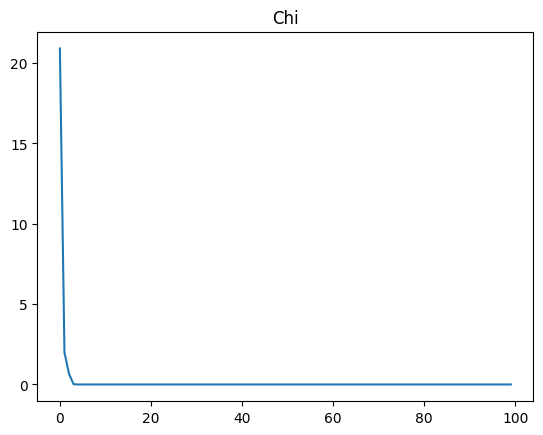

In [41]:
### CORE ###

iterations = 100
damping = 100

chi_stats = np.zeros(iterations)
inliners = np.zeros(iterations)

# test with good initial guess
x_gg = np.array([0.5, 0.5, 0.5, 0.1, 0.1, 0.1])

x, chi_stats, num_inliers = doICP(x_gg, points, Z, iterations, damping, 1e9)

## print results

print("Ground truth\n", x_true)
print("Estimated\n", x)

print("Error chi:" , chi_stats[-1])

# plot chi
plt.figure()
plt.plot(chi_stats)
plt.title("Chi")
plt.show()



P [0.21711684 0.53295385 0.66565618]
P shape (3,)
P-t [0.21711684 0.53295385 0.66565618]
P-t shape (3,)
P [0.50361892 0.04086177 0.42284921]
P shape (3,)
P-t [0.50361892 0.04086177 0.42284921]
P-t shape (3,)
P [0.42251191 0.97818944 0.9378575 ]
P shape (3,)
P-t [0.42251191 0.97818944 0.9378575 ]
P-t shape (3,)
P [0.10821908 0.28122133 0.75796734]
P shape (3,)
P-t [0.10821908 0.28122133 0.75796734]
P-t shape (3,)
P [0.92645794 0.67402166 0.14591026]
P shape (3,)
P-t [0.92645794 0.67402166 0.14591026]
P-t shape (3,)
P [0.21711684 0.53295385 0.66565618]
P shape (3,)
P-t [0.21711684 0.53295385 0.66565618]
P-t shape (3,)
P [0.50361892 0.04086177 0.42284921]
P shape (3,)
P-t [0.50361892 0.04086177 0.42284921]
P-t shape (3,)
P [0.42251191 0.97818944 0.9378575 ]
P shape (3,)
P-t [0.42251191 0.97818944 0.9378575 ]
P-t shape (3,)
P [0.10821908 0.28122133 0.75796734]
P shape (3,)
P-t [0.10821908 0.28122133 0.75796734]
P-t shape (3,)
P [0.92645794 0.67402166 0.14591026]
P shape (3,)
P-t [0.9264579

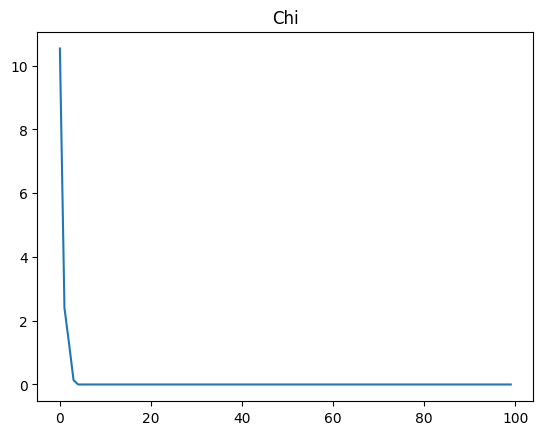

In [42]:
# test with bad initial guess
x_gg = np.array([0, 0, 0, 0, 0, 0])

x, chi_stats, num_inliers = doICP(x_gg, points, Z, iterations, damping, 1e9)
print(x)

## print results

print("Ground truth\n", x_true)
print("Estimated\n", x)

print("Error chi:" , chi_stats[-1])

# plot chi
plt.figure()
plt.plot(chi_stats)
plt.title("Chi")
plt.show()

